In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open("project_euler_solve_counts.json", "r") as f:
    records = json.loads(f.read())
    records = {int(key): value
               for key, value in records.items()}

In [3]:
def solved_counts_plot(records, problems=100):
    solved_counts = {key: value for key, value in records.items()
                     if key <= problems}
    path_to_files = os.path.expanduser("./solutions")
    files = os.listdir(path_to_files)
    solved = sorted([int(filename.split('.')[0][1:])
                     for filename in files
                     if filename[-3:] == '.py' and filename[0] == 'p'])
    plt.figure(figsize=(20, 10))
    plt.style.use('tableau-colorblind10')
    plt.bar(solved_counts.keys(),
            solved_counts.values(),
            color='r')
    plt.bar([s for s in solved if s <= problems],
            [solved_counts[s] for s in solved if s <= problems],
            color='g')
    plt.xlabel('Problem')
    plt.ylabel('Solutions submitted')
    plt.yticks([100000*i for i in range(11)])
    plt.xticks(list(range(0, problems+10, 10)))
    plt.ticklabel_format(style="plain")
    plt.grid()
    plt.show()

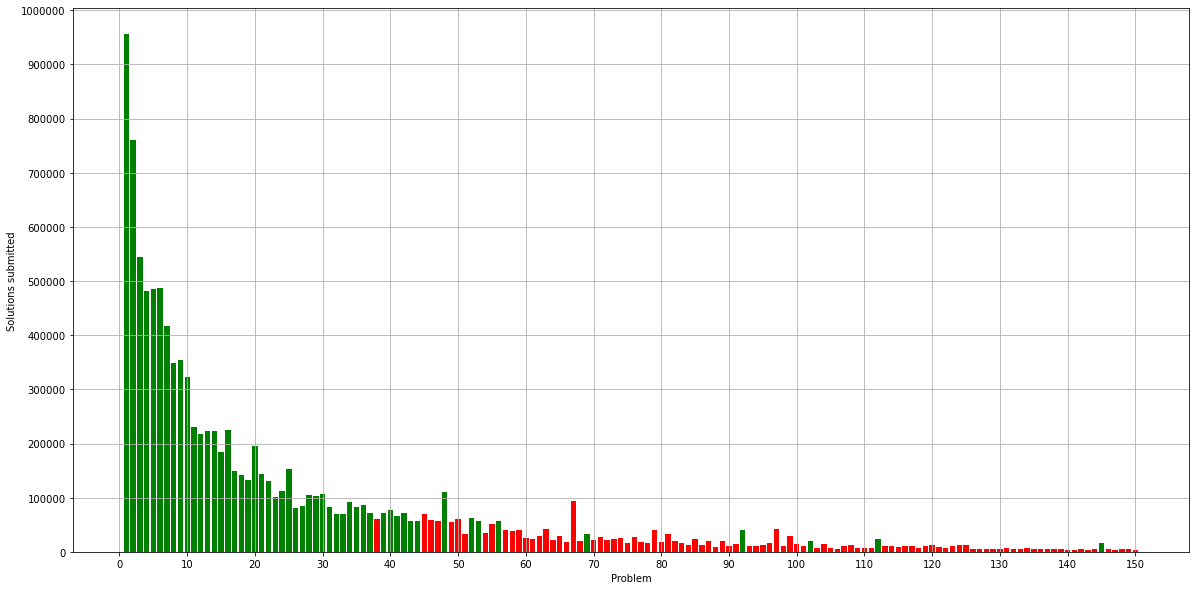

In [4]:
solved_counts_plot(records, 150)